In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import defaultdict
import cv2


from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

sys.path.append('..')

from dataset.artificial_dataset import ArtificialDatasetReader
from utils.metrics import mse, psnr
from models.baseline import Baseline
from models.neural_networks import ResidualDenseNetwork

In [3]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(0)

# Get Data

In [4]:
dr = ArtificialDatasetReader()

In [5]:
x_train, y_train, x_val, y_val, _, _ = dr.get_dataset(img_size=64)

In [6]:
x_train[0].shape, y_train[0].shape

((32, 32), (64, 64))

In [7]:
len(x_train)

1064

# ResidualDenseNetwork

In [8]:
model = ResidualDenseNetwork(init_shape=(32, 32), filters=64, rdb_block_size=6, rdb_blocks=12)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [9]:
model.summary()

Model: "ResidualDenseNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mean_absolute_error (MeanAbs multiple                  2         
_________________________________________________________________
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
rdb (RDB)                    multiple                  250304    
_________________________________________________________________
rdb_1 (RDB)                  multiple                  250304    
_________________________________________________________________
rdb_2 (RDB)                  multiple                  250304    
_________________________________________________________________
rdb_3 (RDB)                  multiple         

## Train

In [10]:
result = model.train_epochs(x_train, y_train, x_val, y_val, 5, 64, frequency=1)

Mean PSNR 38.297156930212935
Epoch: 0 Train Loss: 0.14223624765872955 Validation Loss: 0.017738016322255135 Validation PSNR: 38.297156930212935
Mean PSNR 38.673429563575816
Epoch: 1 Train Loss: 0.017411593347787857 Validation Loss: 0.016429871320724487 Validation PSNR: 38.673429563575816
Mean PSNR 39.23671279930994
Epoch: 2 Train Loss: 0.015699857845902443 Validation Loss: 0.014160792343318462 Validation PSNR: 39.23671279930994
Mean PSNR 39.985350487618554
Epoch: 3 Train Loss: 0.012664543464779854 Validation Loss: 0.011279418133199215 Validation PSNR: 39.985350487618554
Mean PSNR 42.30818788647204
Epoch: 4 Train Loss: 0.009514981880784035 Validation Loss: 0.00793507881462574 Validation PSNR: 42.30818788647204
Mean PSNR 42.30818788647204
Epoch: 4 Train Loss: 0.009514981880784035 Validation Loss: 0.00793507881462574 Validation PSNR: 42.30818788647204


<AxesSubplot:>

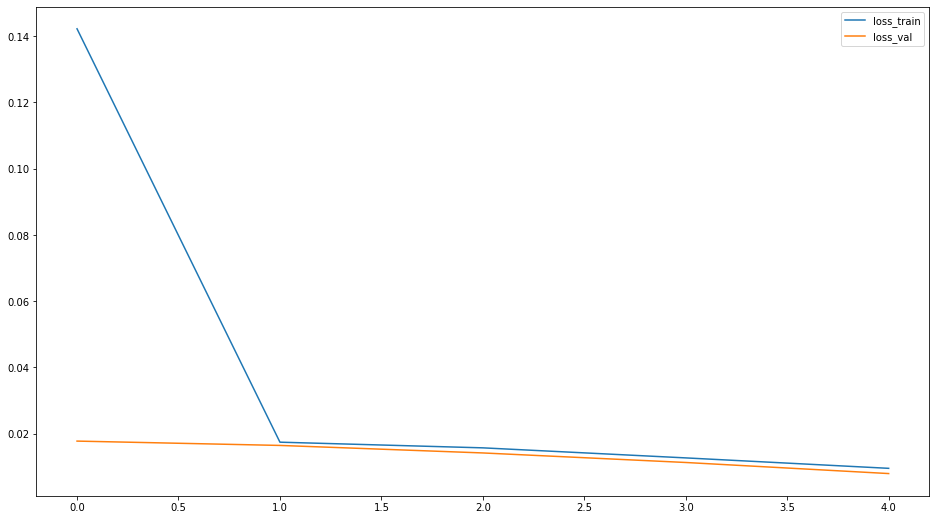

In [11]:
result.plot()

In [12]:
y = model(x_val)

In [13]:
_ = mse(y_val, y)
_ = psnr(y_val, y)

Mean MSE 0.0006906754719450285
Mean PSNR 42.30818788647204


In [14]:
save_path = model.save_weights()

NameError: name 'f' is not defined

In [ ]:
model_2= MLP((32, 32), [512], learning_rate=0.0001, activ_hidden=tf.nn.tanh, activ_out=tf.nn.tanh)

In [ ]:
model_2.load_weights(save_path)

In [ ]:
y = model(x_val)
_ = mse(y_val, y)
_ = psnr(y_val, y)

In [ ]:
model_2.total_epochs